In [1]:
%matplotlib inline
from pyvista import set_plot_theme
set_plot_theme('document')

In [2]:
from platform import python_version
print(python_version())

3.7.7



# Model 2 - Anticline


A simple anticline structure. We start by importing the necessary
dependencies:




In [2]:
# Importing GemPy
import gempy as gp

import pandas as pd
pd.set_option('precision', 2)

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\ASUS\AppData\Local\conda\conda\envs\tf\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
import numpy as np
import matplotlib.pyplot as plt


Creating the model by importing the input data and displaying it:




In [36]:
data_path = 'https://raw.githubusercontent.com/cgre-aachen/gempy_data/master/'
path_to_data = data_path + "/data/input_data/jan_models/"
geo_data = gp.create_data('fold', extent=[0, 1000, 0, 1000, 0, 1000], resolution=[20, 2, 20],
                          path_o=path_to_data + "model2_orientations.csv",
                          path_i=path_to_data + "model2_surface_points.csv")

Active grids: ['regular']


In [37]:
geo_data.get_data().head()

X    Y    Z    smooth surface  G_x  G_y  G_z
surface_points 0    0  100  200  2.00e-06   rock1  NaN  NaN  NaN
               1    0  500  200  2.00e-06   rock1  NaN  NaN  NaN
               2    0  900  200  2.00e-06   rock1  NaN  NaN  NaN
               3  400  100  600  2.00e-06   rock1  NaN  NaN  NaN
               4  400  500  600  2.00e-06   rock1  NaN  NaN  NaN

Setting and ordering the units and series:




In [38]:
gp.map_stack_to_surfaces(geo_data, {"Strat_Series": ('rock2', 'rock1'), "Basement_Series": ('basement')})

,surface,series,order_surfaces,color,id
0,rock1,Strat_Series,1,#015482,1
1,rock2,Strat_Series,2,#9f0052,2
2,basement,Basement_Series,1,#ffbe00,3


C:\Users\ASUS\AppData\Local\conda\conda\envs\tf\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


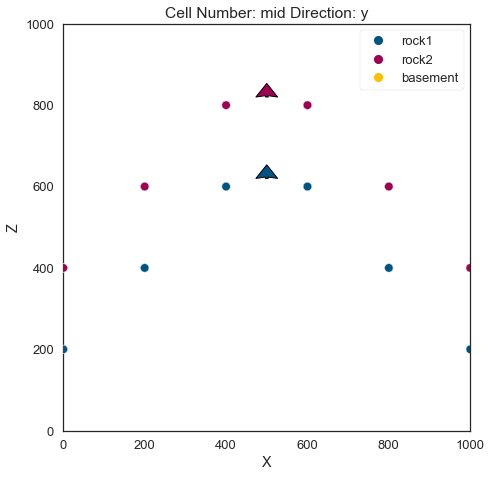

In [7]:
gp.plot_2d(geo_data, direction=['y'])

Calculating the model:




In [8]:
interp_data = gp.set_interpolator(geo_data, theano_optimizer='fast_compile')

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                   values
range            1.7e+03
$C_o$            7.1e+04
drift equations   [3, 3]


In [9]:
geo_data.orientations

,X,Y,Z,G_x,G_y,G_z,smooth,surface
1,500,500,620,1.00e-12,1.00e-12,1.0,0.01,rock1
0,500,500,820,1.00e-12,1.00e-12,1.0,0.01,rock2


In [10]:
sol = gp.compute_model(geo_data)

Displaying the result in y and x direction:




C:\Users\ASUS\AppData\Local\conda\conda\envs\tf\lib\site-packages\gempy\plot\plot_api.py:261: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  p.fig.show()


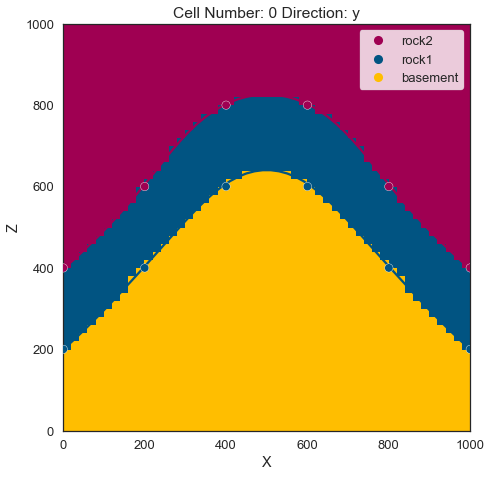

In [11]:
gp.plot_2d(geo_data, cell_number=0,
           direction='y', show_data=True)

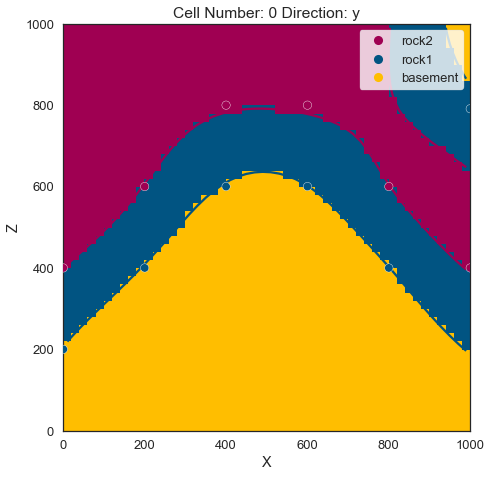

In [12]:
import numpy as np
Z = np.random.normal(1000, 500, size=2)
geo_data.modify_surface_points([11, 15], Z=Z)
gp.compute_model(geo_data)
gp.plot_2d(geo_data, cell_number=0,
           direction='y', show_data=True)
#plot_geo_setting()

In [12]:
#this cell generates lithology blocks, n_iterations defines the number of lithology blocks which we want by manipulating data
#lith_block is a 1d array 
lith_blocks = np.array([])
n_iterations = 6
for i in range(n_iterations):
    Z = np.random.normal(1000, 500, size=2)
    geo_data.modify_surface_points([2, 3], Z=Z)
    gp.compute_model(geo_data)
    lith_blocks = np.append(lith_blocks, geo_data.solutions.lith_block)
    #plt.imshow(geo_data.solutions.lith_block.reshape(50,2,50)[:, 0, :].T,origin='bottom')
lith_blocks = lith_blocks.reshape(n_iterations, -1)
#plt.imshow(geo_data.solutions.lith_block.reshape(50,2,50)[:, 0, :].T,origin='bottom')

In [13]:
print(lith_blocks.shape)

(6, 5000)


In [14]:
#converting 1D array of a single block from lith_blocks to a 50,2,50 3d array
new_blocks = []
for bloc in lith_blocks:
    block_reshaped = np.reshape(bloc,(50,2,50))
    print(block_reshaped.shape)
    new_blocks.append(block_reshaped) 

    

(50, 2, 50)
(50, 2, 50)
(50, 2, 50)
(50, 2, 50)
(50, 2, 50)
(50, 2, 50)


In [15]:
#getting slices from the 3d array we got from lith_blocks(the ones saved in 'new_blocks' list)
slices_from_blocks = []
for arr in new_blocks:
    model_slices = arr[:,1,:]
    print(model_slices.shape)
    slices_from_blocks.append(model_slices)

(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)


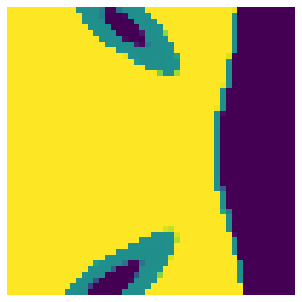

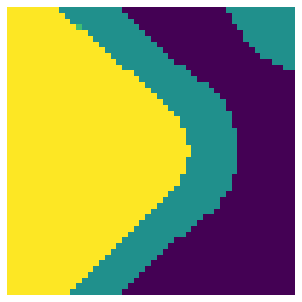

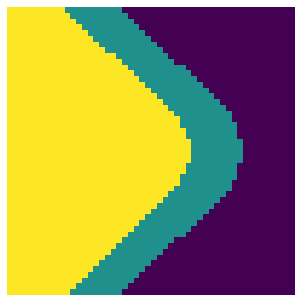

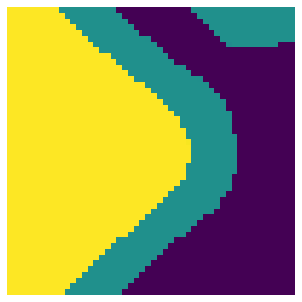

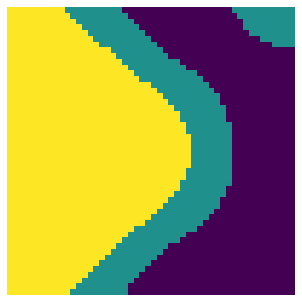

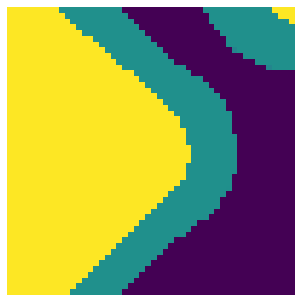

In [25]:
#using enumerate method to save a list of arrays as images into a directory THIS WORKED OUT FINALLY!!!!!!!!!

output_dir = r'C:\Users\ASUS\Desktop\gempy_models\training_data\gempy_model_'

for i,im in enumerate(slices_from_blocks): #i is the index of the list, im is the array object inside the list
    
    fig = plt.figure(figsize=(4,4))
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
   
    plt.imshow(im, cmap = 'viridis')
    #im.set_cmap('hot')
    plt.savefig(output_dir + f'{i}.png')
  
    

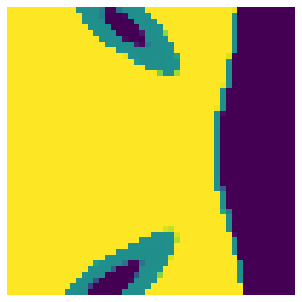

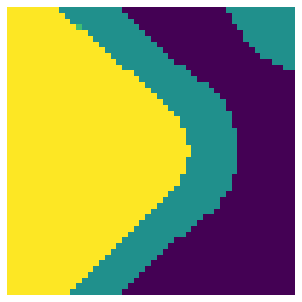

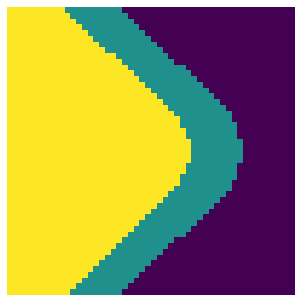

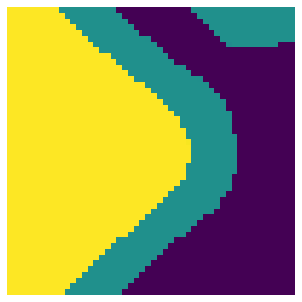

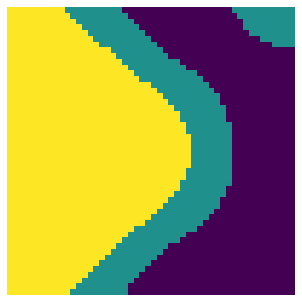

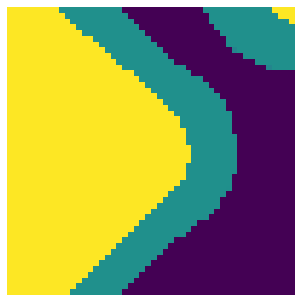

In [35]:
directo = r'C:\Users\ASUS\Desktop\gempy_models\training_data'
new_directo = 'gempy_model'
path = os.path.join(directo,new_directo) 
os.mkdir(path)
for i,im in enumerate(slices_from_blocks): #i is the index of the list, im is the array object inside the list
    
    fig = plt.figure(figsize=(4,4))
    ax = plt.Axes(fig,[0., 0., 1., 1.]) #
    ax.set_axis_off()
    fig.add_axes(ax)
   
    plt.imshow(im, cmap = 'viridis')
    #im.set_cmap('hot')
    plt.savefig(path + f'{i}.png')
  

In [26]:
#code to load and read iamges from a directory
import cv2 
import os 
import glob 
img_dir = r'C:\Users\ASUS\Desktop\gempy_models\training_data'  
data_path = os.path.join(img_dir,'*g') 
files = glob.glob(data_path) 
data = [] 
for f1 in files: 
    img = cv2.imread(f1) 
    print(img.shape)
    #data.append(img) 

(288, 288, 3)
(288, 288, 3)
(288, 288, 3)
(288, 288, 3)
(288, 288, 3)
(288, 288, 3)


In [133]:
#using opencv to write images to a directory using the enumerate but it gives null array as output
disk_dir = r'C:\Users\ASUS\Desktop\gempy_models\training_data\Newfolder'
for im,image in enumerate(slices_from_blocks):
    #im = cv2.imread(image)
    #print(image[:4])
    
    image = image.astype(np.int8)
    #im = im.astype(np.int8)
    print(image[:1])
    print(image.dtype)
    cv2.imwrite(r'C:\Users\ASUS\Desktop\gempy_models\training_data' + f'{im}.png', image)

[[3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
  2 2 2 2 2 2 2 2 2 3 3 3 3 3]]
int8
[[3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
int8
[[3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
int8
[[3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
int8
[[3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
int8
[[3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
int8


In [118]:
#using PIL to write images to a directory using the enumerate but it gives ERROR
from PIL import Image
disk_dir = r'C:\Users\ASUS\Desktop\gempy_models\training_data'
for i, image in enumerate(slices_from_blocks):
    Image.fromarray(image).save(disk_dir + f"{i}.png")


OSError: cannot write mode F as PNG

In [87]:
def plotimages(image_arr):
   fig, axes= plt.subplots(1,i, figsize=(20,20))
   for img, ax in zip(image_arr, axes):
     ax.imshow(img)
     plt.tight_layout()
     plt.imshow(img)

(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)
(50, 50)


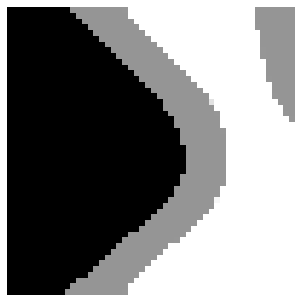

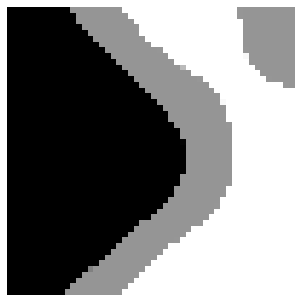

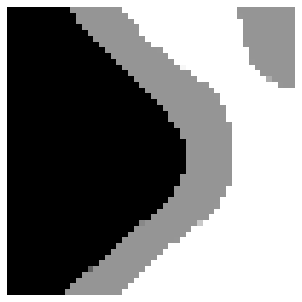

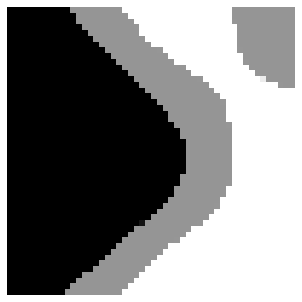

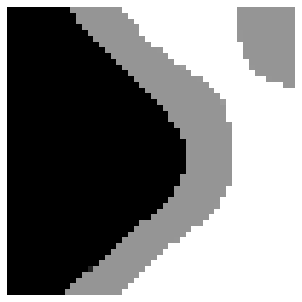

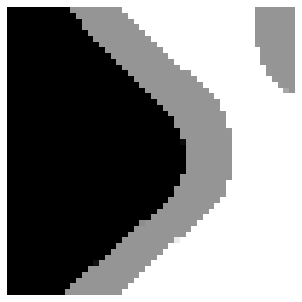

In [127]:
#using enumerate method to save a list of arrays as images into a directory THIS WORKED OUT FINALLY!!!!!!!!!
output_dir = r'C:\Users\ASUS\Desktop\gempy_models\training_data\Newfolder'
for i,im in enumerate(new_blocks):
    #print(i.shape)
    im = im[:,0,:]
    print(im.shape)
    my_dpi=100

    fig = plt.figure(figsize=(4,4))

    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)
    plt.imshow(im)
    plt.savefig(output_dir + f'{i}.png')
    #plt.savefig(r'C:\Users\ASUS\Desktop\gempy_models\training_data\geo_model_2.png')
    #plt.imsave(r'C:\Users\ASUS\Desktop\gempy_models\training_data\geo_model_2.png', im)
    

sphinx_gallery_thumbnail_number = 2



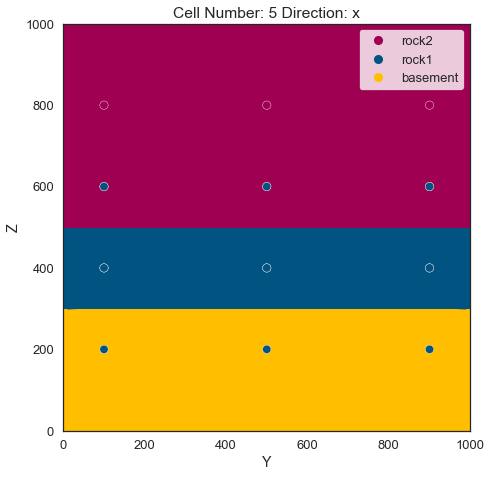

In [26]:
geo_model = gp.plot_2d(geo_data, cell_number=5,
           direction='x', show_data=True)
plt.savefig('geo_model.png')